###Preparação e Análise de Dados

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Trabalho Piva/health_data.csv', na_values=[' ', '_'])

In [ ]:
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70000 non-null  int64  
 1   id           70000 non-null  float64
 2   age          70000 non-null  float64
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  float64
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  float64
 7   ap_lo        70000 non-null  float64
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 7.5 MB


In [ ]:
df.nunique()

Unnamed: 0     70000
id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,0.349571,164.359229,74.205690,128.817286,96.630414,0.366871,0.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,1.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.count()

Unnamed: 0     70000
id             70000
age            70000
gender         70000
height         70000
weight         70000
ap_hi          70000
ap_lo          70000
cholesterol    70000
gluc           70000
smoke          70000
alco           70000
active         70000
cardio         70000
dtype: int64

In [ ]:
print(df.isna().sum())

Unnamed: 0     0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


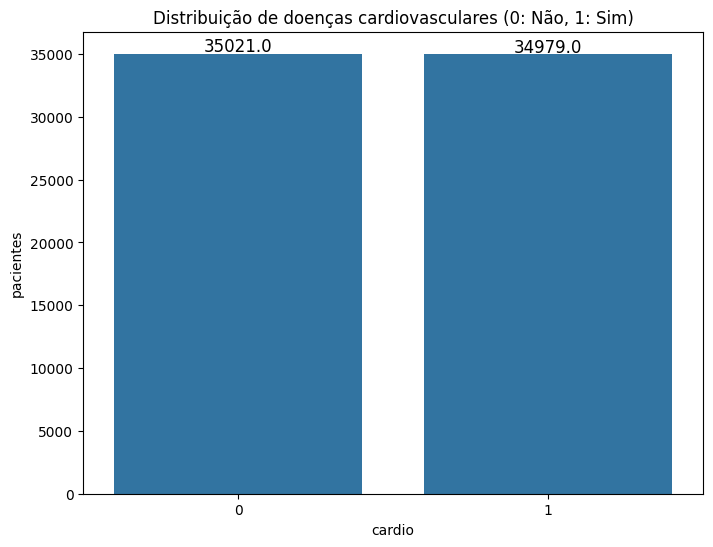

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='cardio', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12,
                color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Distribuição de doenças cardiovasculares (0: Não, 1: Sim)')
plt.xlabel('cardio')
plt.ylabel('pacientes')
plt.show()

In [ ]:
df['IMC'] = df['weight']/((df['height']/100)**2)
df['IMC'] = df['IMC'].round(1)
df['idade'] = df['age']/365
df['idade'] = df['idade'].astype(int)

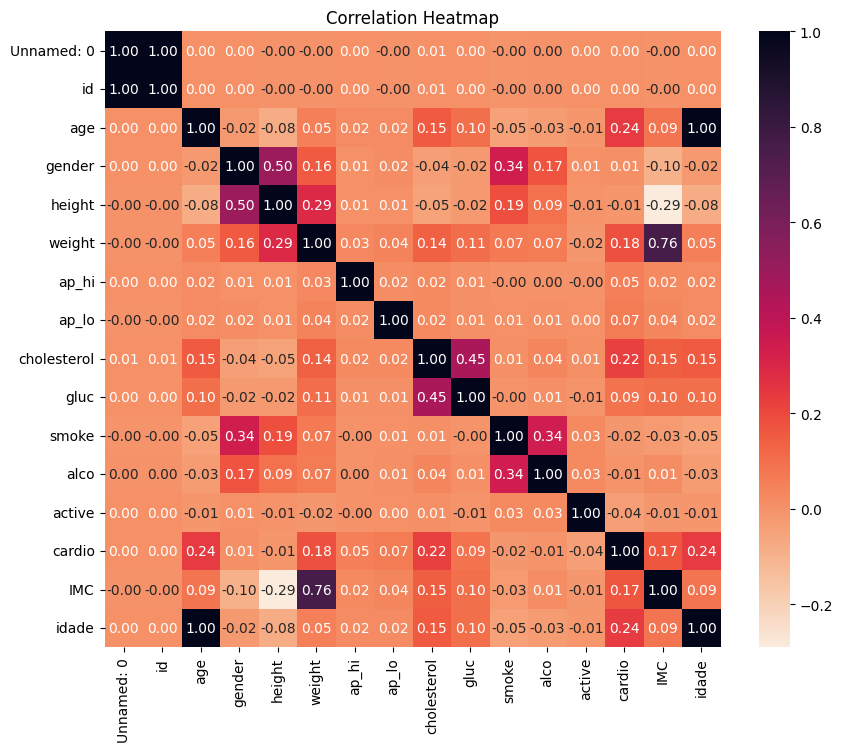

In [ ]:
plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), square=True, annot=True, cmap=sns.cm.rocket_r, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df.drop(['age', 'height', 'weight', 'id', 'Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.duplicated().sum()

9167

In [ ]:
df.drop_duplicates(inplace=True)

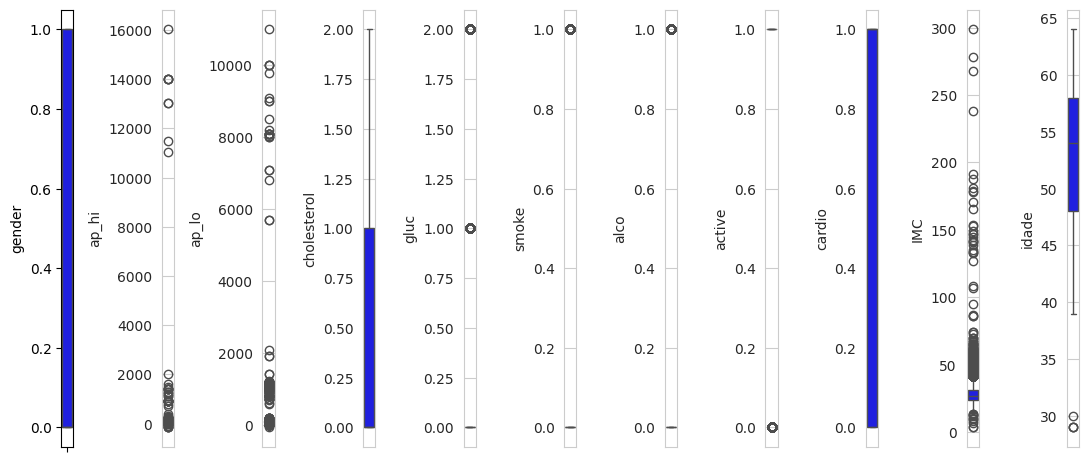

In [ ]:
l = df.columns.values
number_of_columns=12
number_of_rows = len(l)-1//number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='blue',orient='v')
    plt.tight_layout()

In [ ]:
#sns.pairplot(df, hue='cardio')

###Tratamento de outliers

In [ ]:
df_c0 = df[df['cardio'] == 0]
df_c1 = df[df['cardio'] == 1]

In [ ]:
lista = ['ap_lo', 'ap_hi', 'IMC']
df_quartil = pd.DataFrame(index=['Q minimo', 'Q maximo'])

for e in lista:
    Q1 = df_c0[e].quantile(0.25)
    Q3 = df_c0[e].quantile(0.75)
    IQR = Q3 - Q1

    minimo = Q1 - (1.5 * IQR)
    maximo = Q3+ (1.5 * IQR)

    df_quartil[e]= [minimo, maximo]

df_quartil

,ap_lo,ap_hi,IMC
Q minimo,55.0,95.0,14.15
Q maximo,95.0,135.0,38.55


In [ ]:
outlier_c0 = df_c0[(df_c0['ap_lo']>80)|(df_c0['ap_lo']<60)|(df_c0['ap_hi']>121.5)|(df_c0['ap_hi']<117.5)|(df_c0['IMC']>36.65)|(df_c0['IMC']<15.45)].index
df_c0.drop(outlier_c0, inplace=True)

<ipython-input-20-e9e1e0d19972>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c0.drop(outlier_c0, inplace=True)


In [ ]:
lista = ['ap_lo', 'ap_hi', 'IMC']
df_quartil = pd.DataFrame(index=['Q minimo', 'Q maximo'])

for e in lista:
    Q1 = df_c1[e].quantile(0.25)
    Q3 = df_c1[e].quantile(0.75)
    IQR = Q3 - Q1

    minimo = Q1 - (1.5 * IQR)
    maximo = Q3+ (1.5 * IQR)

    df_quartil[e]= [minimo, maximo]

df_quartil

,ap_lo,ap_hi,IMC
Q minimo,65.0,75.0,13.8
Q maximo,105.0,195.0,42.6


In [ ]:
outlier_c1 = df_c1[(df_c1['ap_lo']>105)|(df_c1['ap_lo']<65)|(df_c1['ap_hi']>170)|(df_c1['ap_hi']<90)|(df_c1['IMC']>39.65)|(df_c1['IMC']<14.45)].index
df_c1.drop(outlier_c1, inplace=True)

<ipython-input-22-6eb03831cb60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c1.drop(outlier_c1, inplace=True)


In [ ]:
df = pd.concat([df_c0, df_c1])

In [ ]:
df.describe()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC,idade
count,39554.000000,39554.000000,39554.000000,39554.000000,39554.000000,39554.000000,39554.000000,39554.000000,39554.000000,39554.000000,39554.000000
mean,0.388734,129.549502,82.727486,0.449815,0.267735,0.100597,0.060044,0.777241,0.716868,27.408831,53.468195
std,0.487469,14.053558,7.808645,0.737119,0.616945,0.300798,0.237572,0.416103,0.450526,4.468073,6.725728
min,0.000000,90.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,29.000000
25%,0.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,24.100000,49.000000
50%,0.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,26.700000,54.000000
75%,1.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,30.400000,59.000000
max,1.000000,170.000000,105.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,39.600000,64.000000


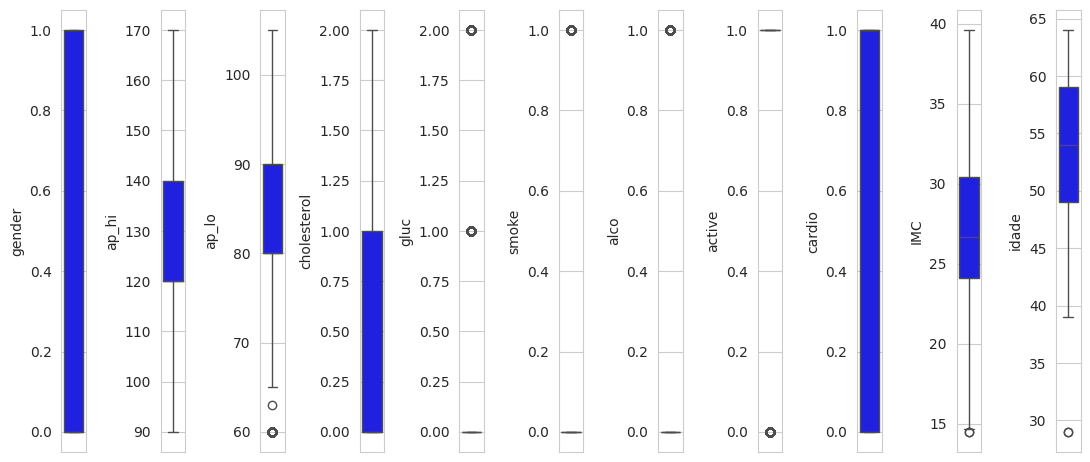

In [ ]:
l = df.columns.values
number_of_columns=12
number_of_rows = len(l)-1//number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='blue',orient='v')
    plt.tight_layout()

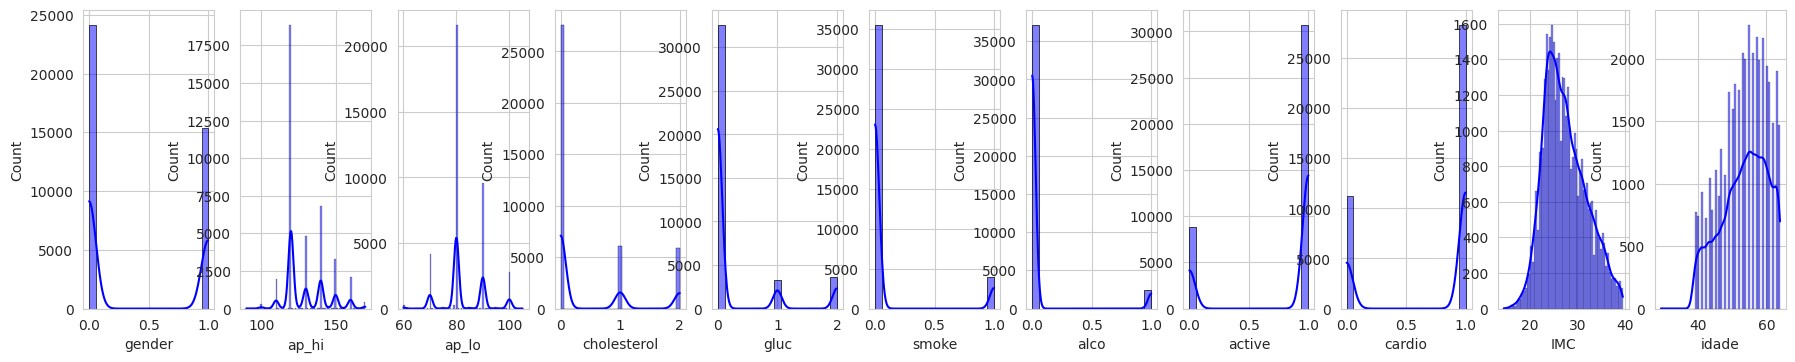

In [ ]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.histplot(df[l[i]], kde=True, color='blue', edgecolor='black')

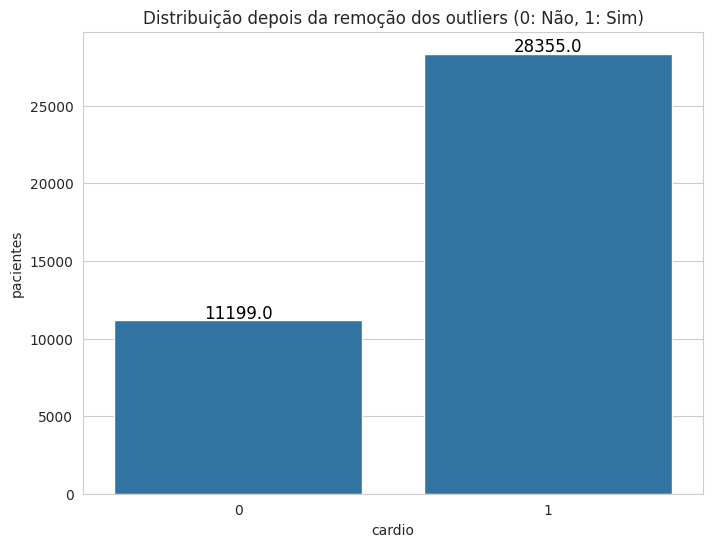

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='cardio', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12,
                color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Distribuição depois da remoção dos outliers (0: Não, 1: Sim)')
plt.xlabel('cardio')
plt.ylabel('pacientes')
plt.show()

### Treinamento IA - Redes Neurais

In [ ]:
X = df.drop('cardio', axis=1)
y = df['cardio']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Antes do SMOTE:")
print(Counter(y_train))
smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("\nDepois do SMOTE:")
print(Counter(y_train_smote))

Antes do SMOTE:
Counter({1: 19853, 0: 7834})

Depois do SMOTE:
Counter({1: 19853, 0: 19853})


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20,20), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train_scaled, y_train_smote)

MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=500)

In [ ]:
predict_train_scaled = mlp.predict(X_train_scaled)
predict_test_scaled = mlp.predict(X_test_scaled)

In [ ]:
train_accuracy_scaled = accuracy_score(y_train_smote, predict_train_scaled)
test_accuracy_scaled = accuracy_score(y_test, predict_test_scaled)

In [ ]:
print(f'Acuracidade de treino: {train_accuracy_scaled}')
print(f'Acuracidade de teste: {test_accuracy_scaled}')

Acuracidade de treino: 0.885684783156198
Acuracidade de teste: 0.8306227353164237


In [ ]:
y_all = np.concatenate([y_train_smote, y_test])
predict_all = np.concatenate([predict_train_scaled, predict_test_scaled])
overall_accuracy = accuracy_score(y_all, predict_all)
print(f'Acuracidade geral: {overall_accuracy}')

Acuracidade geral: 0.8730149496829737


In [ ]:
print("Confusion Matrix - Train")
print(confusion_matrix(y_train_smote, predict_train_scaled))
cm_train = confusion_matrix(y_train_smote, predict_train_scaled)

Confusion Matrix - Train
[[19665   188]
 [ 4351 15502]]


In [ ]:
print("Confusion Matrix - Test")
print(confusion_matrix(y_test, predict_test_scaled))
cm_test = confusion_matrix(y_test, predict_test_scaled)

Confusion Matrix - Test
[[3264  101]
 [1909 6593]]


In [ ]:
print("Confusion Matrix - Overall")
cm_overall = confusion_matrix(y_all, predict_all)
print(cm_overall)

Confusion Matrix - Overall
[[22929   289]
 [ 6260 22095]]


### Gráficos de Matrizes de Confusão

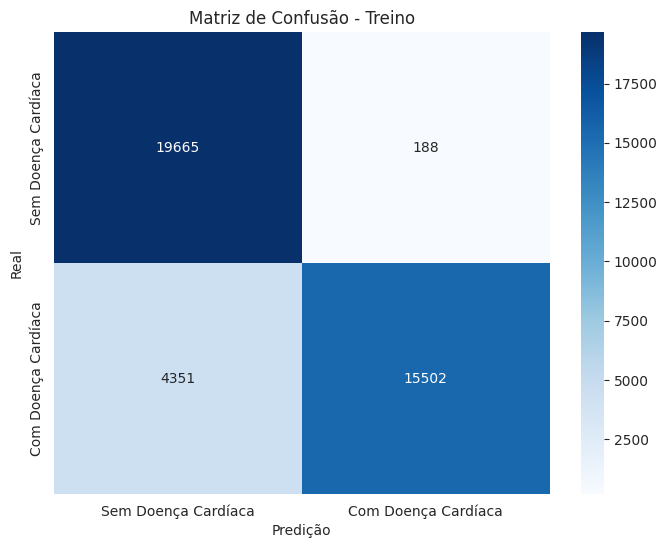

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=["Sem Doença Cardíaca", "Com Doença Cardíaca"], yticklabels=["Sem Doença Cardíaca", "Com Doença Cardíaca"])
plt.ylabel('Real')
plt.xlabel('Predição')
plt.title("Matriz de Confusão - Treino")
plt.show()

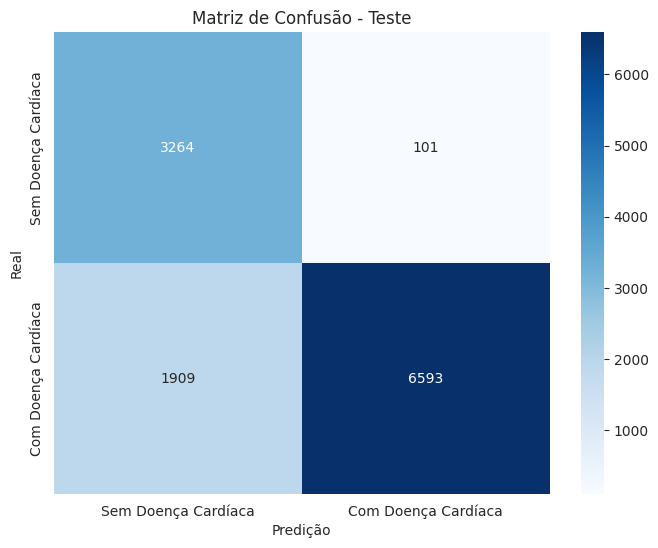

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Sem Doença Cardíaca", "Com Doença Cardíaca"], yticklabels=["Sem Doença Cardíaca", "Com Doença Cardíaca"])
plt.ylabel('Real')
plt.xlabel('Predição')
plt.title("Matriz de Confusão - Teste")
plt.show()

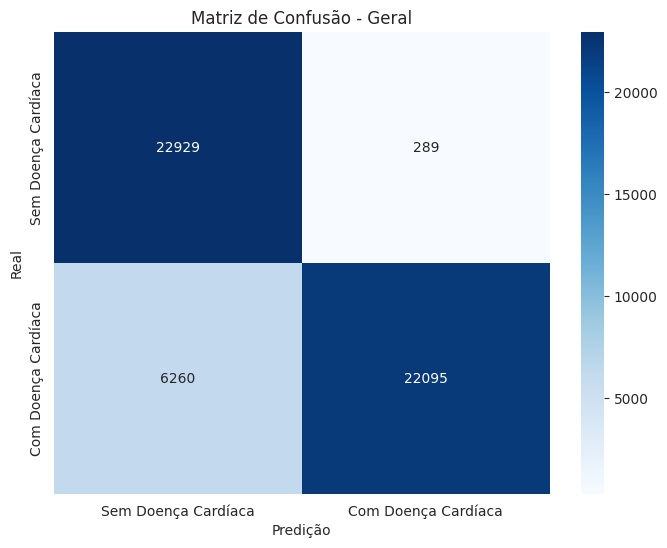

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_overall, annot=True, fmt="d", cmap="Blues", xticklabels=["Sem Doença Cardíaca", "Com Doença Cardíaca"], yticklabels=["Sem Doença Cardíaca", "Com Doença Cardíaca"])
plt.ylabel('Real')
plt.xlabel('Predição')
plt.title("Matriz de Confusão - Geral")
plt.show()